# Importing libraries and data

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [164]:
df = pd.read_excel("data/lichess_games_summary.xlsx")

In [165]:
df.head(5)

,GameId,Site,Date,UTCDate,UTCTime,White,Black,WhiteElo,BlackElo,Result,...,TimeControl,ECO,Opening,Termination,NumMoves,NumTurns,WhiteCastled,BlackCastled,LastMove,MovesSAN
0,rvuBZ8lZ,https://lichess.org/rvuBZ8lZ,2024.06.29,2024.06.29,17:32:22,UdiQ,nishiv_chess,1899.0,1928.0,0-1,...,120+1,A06,Zukertort Opening: Tennison Gambit,Normal,92,46,True,False,Rxe4+,Nf3 d5 e4 dxe4 Ng5 Nc6 Nxe4 Bf5 Nbc3 e6 Qf3 Nf...
1,UHfYzLle,https://lichess.org/UHfYzLle,2024.06.29,2024.06.29,17:29:58,nishiv_chess,Rocknbol,1935.0,1848.0,0-1,...,120+1,B06,Modern Defense,Normal,54,27,False,True,Nc6,e4 g6 d4 Bg7 Be3 d6 Bd3 Nf6 Qd2 O-O Bh6 Ng4 Bx...
2,UOXnYWKB,https://lichess.org/UOXnYWKB,2024.06.29,2024.06.29,17:23:28,nishiv_chess,tmorsy123,1941.0,1907.0,0-1,...,120+1,B01,Scandinavian Defense: Mieses-Kotroc Variation,Time forfeit,106,53,True,True,Nd4,e4 d5 exd5 Qxd5 Nf3 Qe6+ Be2 Nc6 O-O h5 d4 Qg6...
3,yQkk4s62,https://lichess.org/yQkk4s62,2024.06.29,2024.06.29,17:19:10,boensaka,nishiv_chess,1894.0,1947.0,1-0,...,120+1,B20,Sicilian Defense,Normal,67,33,True,True,Rb8#,e4 c5 d3 Nc6 Nf3 e6 Be2 Nge7 c3 Ng6 Bg5 Be7 Be...
4,FlXSw9bJ,https://lichess.org/FlXSw9bJ,2024.06.29,2024.06.29,17:15:41,nishiv_chess,c4Polo,1954.0,1812.0,0-1,...,120+1,B01,Scandinavian Defense: Mieses-Kotroc Variation,Normal,63,31,True,True,Rb5,e4 d5 exd5 Qxd5 Nf3 Bg4 Be2 Nd7 O-O g6 d3 Bg7 ...


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GameId        10999 non-null  object 
 1   Site          10999 non-null  object 
 2   Date          10999 non-null  object 
 3   UTCDate       10999 non-null  object 
 4   UTCTime       10999 non-null  object 
 5   White         10999 non-null  object 
 6   Black         10999 non-null  object 
 7   WhiteElo      10975 non-null  float64
 8   BlackElo      10975 non-null  float64
 9   Result        10999 non-null  object 
 10  Variant       10999 non-null  object 
 11  TimeControl   10999 non-null  object 
 12  ECO           10874 non-null  object 
 13  Opening       10874 non-null  object 
 14  Termination   10999 non-null  object 
 15  NumMoves      10999 non-null  int64  
 16  NumTurns      10999 non-null  int64  
 17  WhiteCastled  10999 non-null  bool   
 18  BlackCastled  10999 non-nu

In [167]:
df.describe()

,WhiteElo,BlackElo,NumMoves,NumTurns
count,10975.000000,10975.000000,10999.000000,10999.000000
mean,1645.478633,1678.190979,63.562960,31.547686
std,208.874090,195.639894,29.913122,14.972080
min,690.000000,666.000000,0.000000,0.000000
25%,1498.000000,1553.000000,43.000000,21.000000
50%,1690.000000,1715.000000,59.000000,29.000000
75%,1794.000000,1818.000000,80.000000,40.000000
max,2766.000000,2680.000000,282.000000,141.000000


In [168]:
df.isnull().sum()

GameId            0
Site              0
Date              0
UTCDate           0
UTCTime           0
White             0
Black             0
WhiteElo         24
BlackElo         24
Result            0
Variant           0
TimeControl       0
ECO             125
Opening         125
Termination       0
NumMoves          0
NumTurns          0
WhiteCastled      0
BlackCastled      0
LastMove          1
MovesSAN          1
dtype: int64

In [169]:
df.nunique()

GameId          10999
Site            10999
Date              614
UTCDate           614
UTCTime          9997
White            4377
Black            3492
WhiteElo         1023
BlackElo          993
Result              3
Variant             9
TimeControl       164
ECO               188
Opening           578
Termination         3
NumMoves          199
NumTurns          105
WhiteCastled        2
BlackCastled        2
LastMove         1868
MovesSAN        10981
dtype: int64

In [170]:
df['Variant'].value_counts()

Variant
Standard            10809
Antichess              92
Crazyhouse             57
Chess960               22
Atomic                  7
Three-check             5
King of the Hill        4
Racing Kings            2
Horde                   1
Name: count, dtype: int64

<Axes: >

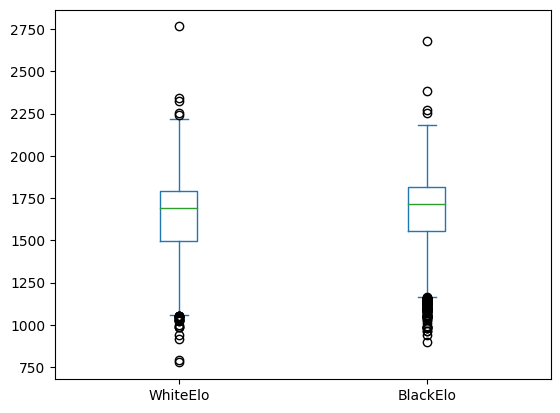

In [171]:
df[df['Variant'] == 'Standard'][['WhiteElo','BlackElo']].plot.box()

# Feature Engineering

### Player Perspective Features

In [172]:
df['PlayerColor'] = df['White'].apply(lambda x :"White" if x == "nishiv_chess" else "Black")

In [173]:
df['PlayerElo'] = df.apply(lambda row : row['WhiteElo'] if row['White'] == 'nishiv_chess' else row['BlackElo'],axis=1)
df['OpponentElo'] = df.apply(lambda row : row['WhiteElo'] if row['White'] != 'nishiv_chess' else row['BlackElo'],axis=1)

In [174]:
df['RatingDiff'] = df['PlayerElo'] - df['OpponentElo']

In [175]:
df['MatchResult'] = df.apply(lambda row : "Draw" if row['Result'] == '1/2-1/2' 
                             else "Win" if (row['Result'] == '1-0' and row['PlayerColor'] == 'White') or (row['Result'] == '0-1' and row['PlayerColor'] == 'Black')
                             else "Loss",axis = 1)

### Time Related Features

In [176]:
# Convert to datetime with UTC timezone
df['UTCDateTime'] = pd.to_datetime(
    df['UTCDate'] + ' ' + df['UTCTime'],
    format="%Y.%m.%d %H:%M:%S",
    errors='coerce'
).dt.tz_localize('UTC')

df['LocalDateTime'] = df['UTCDateTime'].dt.tz_convert('Asia/Kolkata')

In [177]:
df['LocalDateTime'].dtype

datetime64[ns, Asia/Kolkata]

In [178]:
df['GameDay'] = df['LocalDateTime'].dt.day
df['DayOfWeek'] = df['LocalDateTime'].dt.day_name()
df['GameHour'] =df['LocalDateTime'].dt.hour
df['Month-Year'] = df['LocalDateTime'].dt.to_period('M').dt.to_timestamp()

C:\Users\dell\AppData\Local\Temp\ipykernel_8172\1503967169.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month-Year'] = df['LocalDateTime'].dt.to_period('M').dt.to_timestamp()


In [179]:
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x : x == 'Saturday' or x == 'Sunday')

### Game Type & Progression

In [180]:
def game_type(timecontrol):

    if timecontrol == '-': # Games played with Platform chess engines
        return "Correspondence"
    
    base,inc = map(int,timecontrol.split('+'))
    estimated_time = base + inc*40  # Average moves = 40 as considered by Lichess and other platforms
    if estimated_time < 180:
        return "Bullet"
    elif estimated_time >= 180 and estimated_time < 600:
        return "Blitz"
    elif estimated_time >= 600 and estimated_time < 1800:
        return "Rapid"
    else:
        return "Classical"

In [181]:
df['GameType'] = df['TimeControl'].apply(game_type)

In [182]:
df[['MainOpening','OpeningVariation']] = df['Opening'].str.split(': ', n=1, expand=True)

### Game Quality

In [183]:
def termination_type(row):
    if row['Termination'] == "Normal":
        if row['LastMove'] is None or str(row['LastMove'])[-1] != '#':
            return "Resigned"
        else:
            return "Checkmate"
    return row['Termination']

In [184]:
df['TerminationType'] = df.apply(termination_type,axis = 1)

In [185]:
df['GameLength'] = df['NumTurns'].apply(lambda x : "Short" if x < 10 else "Medium" if x >= 10 and x < 60 else "Long")

# Exploratory Data Analysis

## Overview Statistics

In [186]:
df.head()

,GameId,Site,Date,UTCDate,UTCTime,White,Black,WhiteElo,BlackElo,Result,...,GameDay,DayOfWeek,GameHour,Month-Year,IsWeekend,GameType,MainOpening,OpeningVariation,TerminationType,GameLength
0,rvuBZ8lZ,https://lichess.org/rvuBZ8lZ,2024.06.29,2024.06.29,17:32:22,UdiQ,nishiv_chess,1899.0,1928.0,0-1,...,29,Saturday,23,2024-06-01,True,Bullet,Zukertort Opening,Tennison Gambit,Resigned,Medium
1,UHfYzLle,https://lichess.org/UHfYzLle,2024.06.29,2024.06.29,17:29:58,nishiv_chess,Rocknbol,1935.0,1848.0,0-1,...,29,Saturday,22,2024-06-01,True,Bullet,Modern Defense,None,Resigned,Medium
2,UOXnYWKB,https://lichess.org/UOXnYWKB,2024.06.29,2024.06.29,17:23:28,nishiv_chess,tmorsy123,1941.0,1907.0,0-1,...,29,Saturday,22,2024-06-01,True,Bullet,Scandinavian Defense,Mieses-Kotroc Variation,Time forfeit,Medium
3,yQkk4s62,https://lichess.org/yQkk4s62,2024.06.29,2024.06.29,17:19:10,boensaka,nishiv_chess,1894.0,1947.0,1-0,...,29,Saturday,22,2024-06-01,True,Bullet,Sicilian Defense,None,Checkmate,Medium
4,FlXSw9bJ,https://lichess.org/FlXSw9bJ,2024.06.29,2024.06.29,17:15:41,nishiv_chess,c4Polo,1954.0,1812.0,0-1,...,29,Saturday,22,2024-06-01,True,Bullet,Scandinavian Defense,Mieses-Kotroc Variation,Resigned,Medium


In [187]:
df.columns

Index(['GameId', 'Site', 'Date', 'UTCDate', 'UTCTime', 'White', 'Black',
       'WhiteElo', 'BlackElo', 'Result', 'Variant', 'TimeControl', 'ECO',
       'Opening', 'Termination', 'NumMoves', 'NumTurns', 'WhiteCastled',
       'BlackCastled', 'LastMove', 'MovesSAN', 'PlayerColor', 'PlayerElo',
       'OpponentElo', 'RatingDiff', 'MatchResult', 'UTCDateTime',
       'LocalDateTime', 'GameDay', 'DayOfWeek', 'GameHour', 'Month-Year',
       'IsWeekend', 'GameType', 'MainOpening', 'OpeningVariation',
       'TerminationType', 'GameLength'],
      dtype='object')

In [188]:
# Total games
total_games = df.shape[0]

# Results 
wins = (df['MatchResult'] == 'Win').sum()
losses = (df['MatchResult'] == 'Loss').sum()
draws = (df['MatchResult'] == 'Draw').sum()

# Color Distribution
games_white = (df['PlayerColor'] == 'White').sum()
games_black = total_games - games_white

# Game Types
game_types = df['GameType'].value_counts()
game_variants = df['Variant'].value_counts()
termination_types = df['TerminationType'].value_counts()

In [189]:
# Print Summary

print(f'Total games played : {total_games}')
print(f'Wins : {wins}')
print(f'Losses : {losses}')
print(f'Draws : {draws} \n')

print(f'Games as white : {games_white}')
print(f'Games as black : {games_black} \n')

print(f'Game by types:')
print(game_types.to_string(),'\n')

print(f'Games by Variant:')
print(game_variants.to_string(),'\n')

print(f'Games Termination Types:')
print(termination_types.to_string(),'\n')

Total games played : 10999
Wins : 7820
Losses : 2883
Draws : 296 

Games as white : 4757
Games as black : 6242 

Game by types:
GameType
Blitz             5951
Bullet            4306
Rapid              701
Correspondence      41 

Games by Variant:
Variant
Standard            10809
Antichess              92
Crazyhouse             57
Chess960               22
Atomic                  7
Three-check             5
King of the Hill        4
Racing Kings            2
Horde                   1 

Games Termination Types:
TerminationType
Resigned        6371
Time forfeit    2436
Checkmate       2190
Abandoned          2 



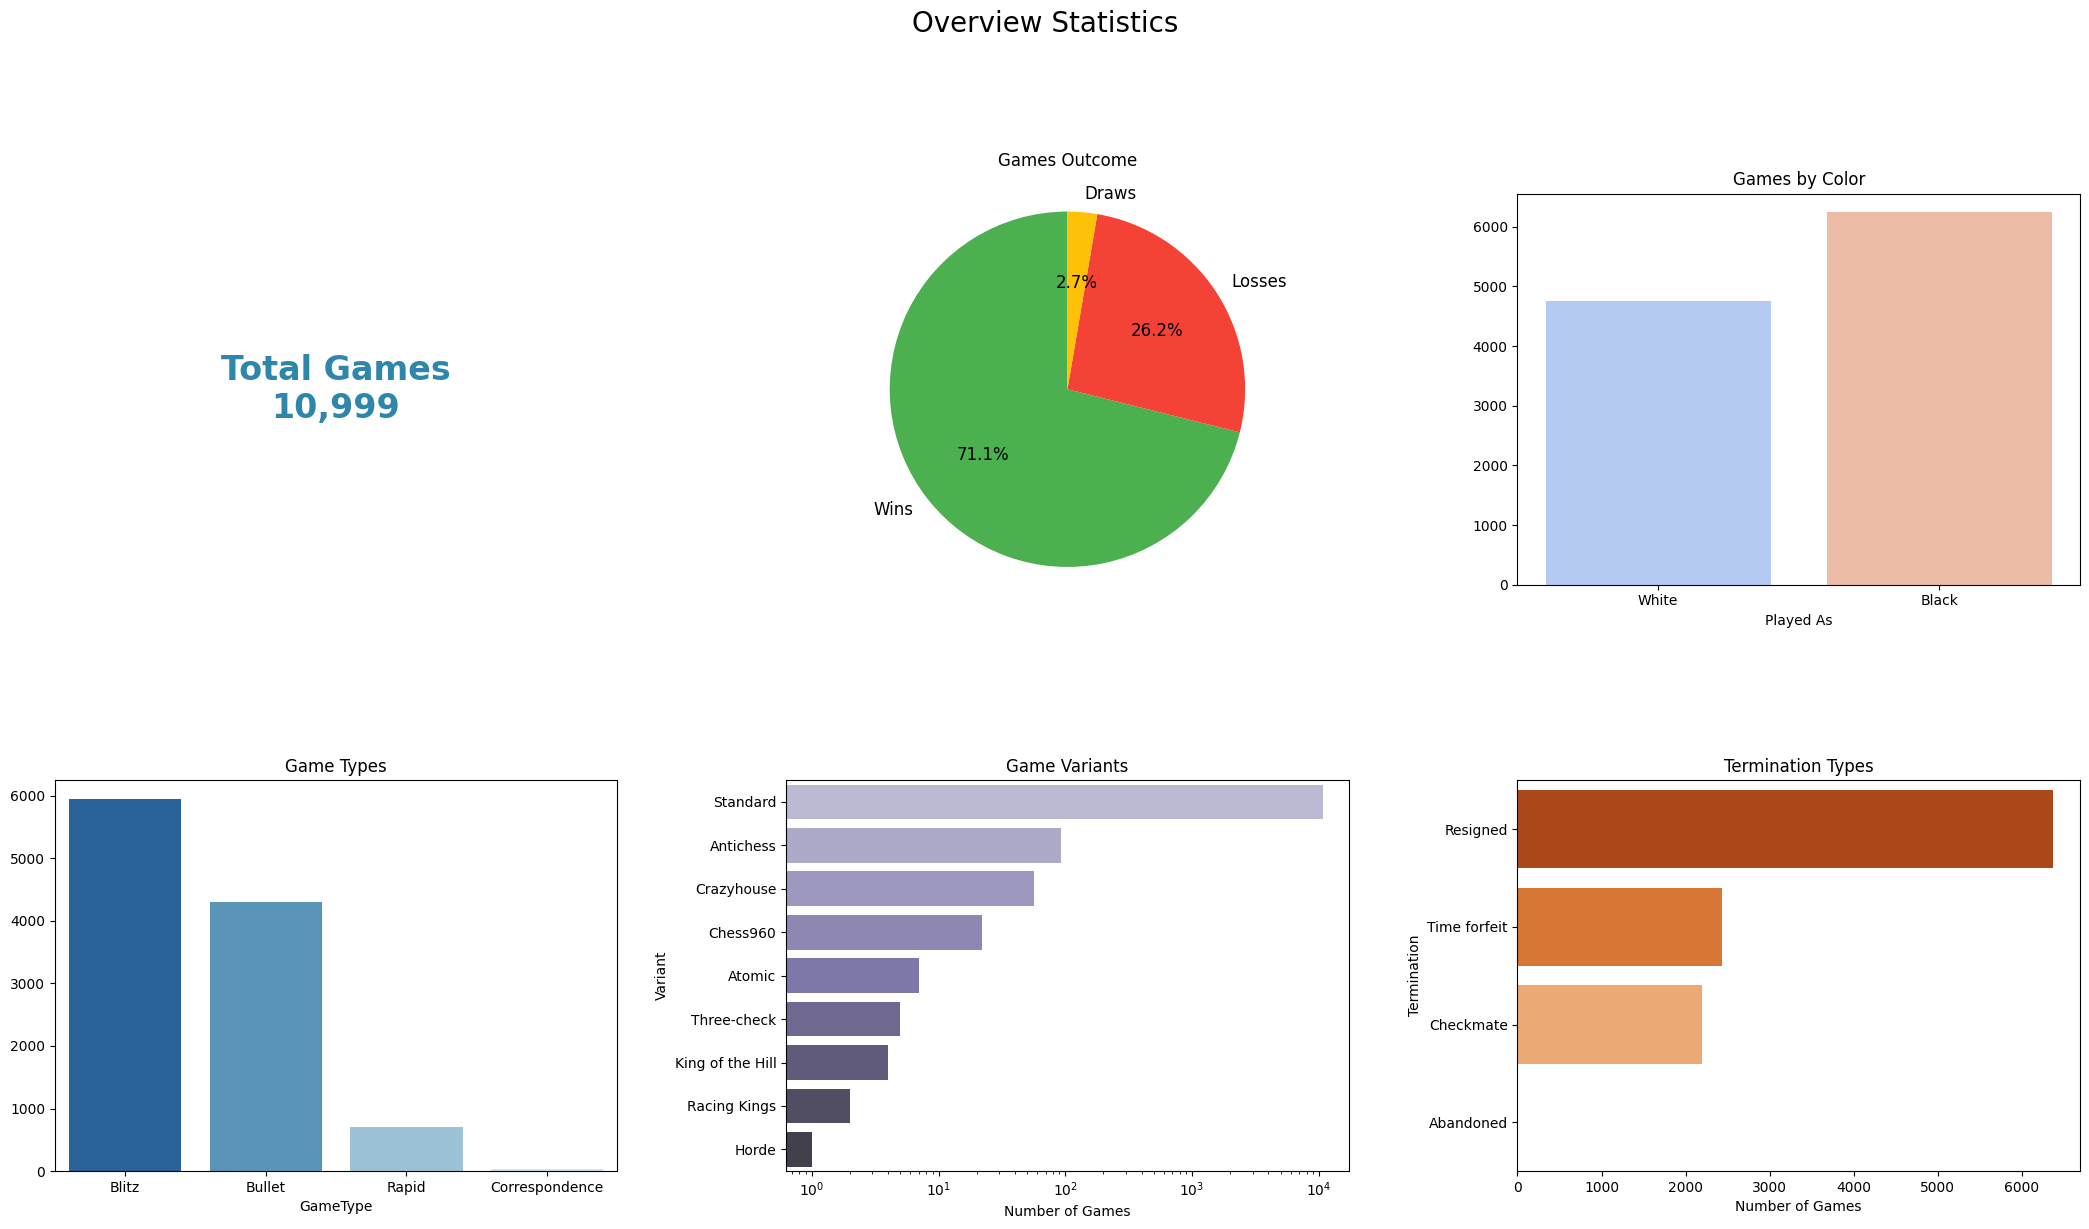

In [190]:
fig, axes = plt.subplots(2, 3, figsize=(21, 12))
fig.suptitle("Overview Statistics", fontsize=20, y=1.02)

# 1. KPI Card – Total Games
axes[0][0].text(0.5, 0.5, f'Total Games\n{total_games:,}',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=24, fontweight='bold',
                color='#2E86AB')
axes[0][0].axis('off')

# 2. Games Outcome
axes[0][1].pie([wins, losses, draws],
               labels=['Wins', 'Losses', 'Draws'],
               autopct='%1.1f%%',
               colors=['#4CAF50', '#F44336', '#FFC107'],
               startangle=90,
               textprops={'fontsize': 12})
axes[0][1].set_title("Games Outcome", pad=20)
axes[0][1].axis('equal')

# 3. Games by Color
sns.barplot(x=['White', 'Black'],
            y=[games_white, games_black],
            palette='coolwarm',
            ax=axes[0][2])
axes[0][2].set_title('Games by Color')
axes[0][2].set_xlabel('Played As')

# 4. Game Types
sns.barplot(x=game_types.index,
            y=game_types.values,
            palette='Blues_r',
            ax=axes[1][0])
axes[1][0].set_title('Game Types')
axes[1][0].tick_params(axis='x')

# 5. Game Variants (Log Scale)
sns.barplot(x=game_variants.values,
            y=game_variants.index,
            palette='Purples_d',
            ax=axes[1][1])
axes[1][1].set_xscale('log')
axes[1][1].set_title('Game Variants')
axes[1][1].set_xlabel('Number of Games')
axes[1][1].set_ylabel('Variant')

# 6. Termination Types
sns.barplot(x=termination_types.values,
            y=termination_types.index,
            palette='Oranges_r',
            ax=axes[1][2])
axes[1][2].set_title('Termination Types')
axes[1][2].set_xlabel('Number of Games')
axes[1][2].set_ylabel('Termination')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


## Time Based Analysis

In [191]:
month_data = df.groupby(['Month-Year'])

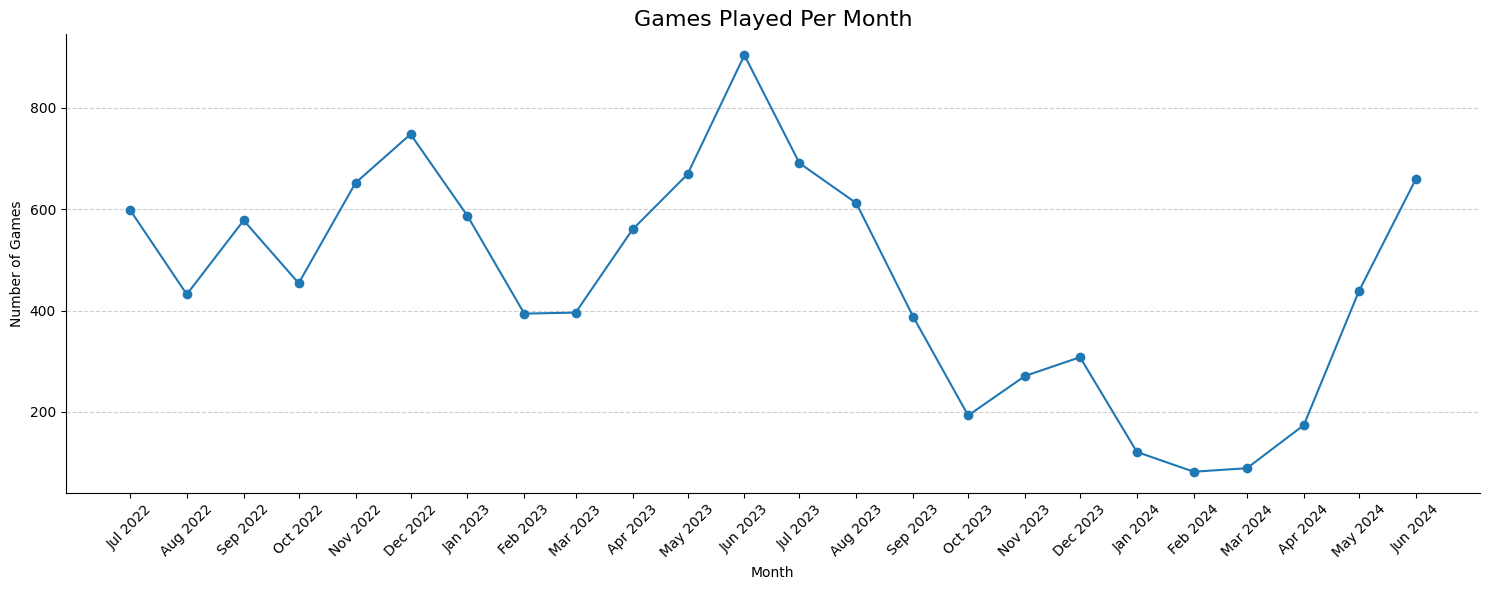

In [192]:
import matplotlib.dates as mdates

monthwise_total_games = month_data.size()

fig,ax = plt.subplots(figsize=(15,6))
ax.plot(monthwise_total_games.index,monthwise_total_games.values,marker='o')

ax.set_xticks(monthwise_total_games.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation = 45)
plt.grid(axis='y',linestyle='--',alpha=0.6)

ax.set_title("Games Played Per Month",fontsize=16)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Games')

sns.despine()
plt.tight_layout()

plt.show()

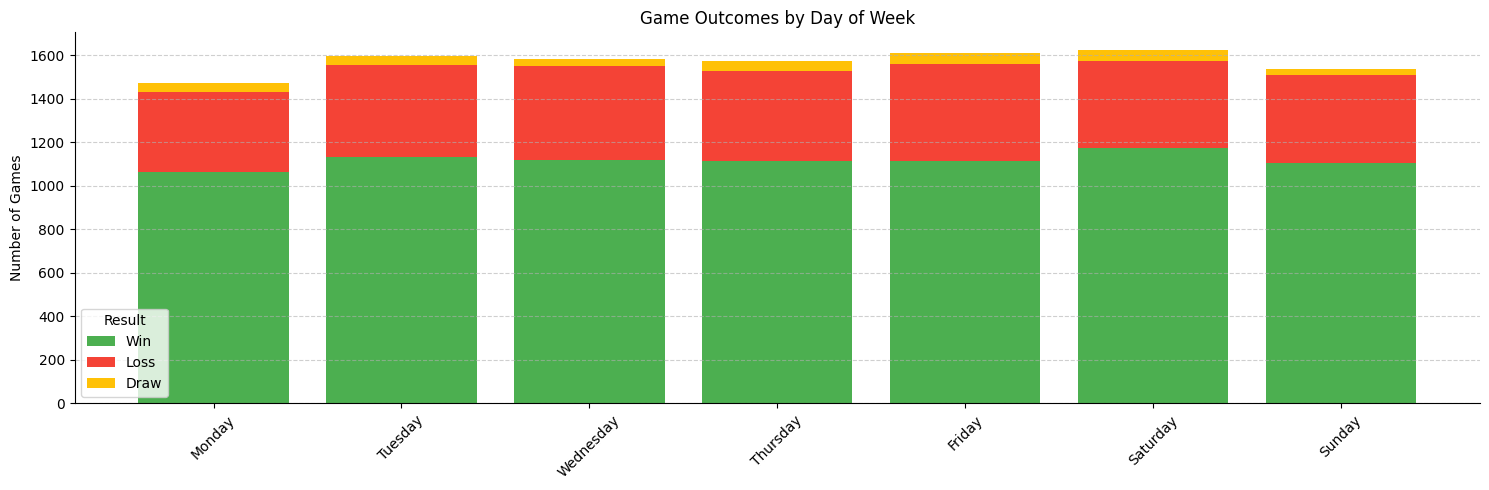

In [193]:
# Define display order and color map
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
result_colors = {'Win': '#4CAF50', 'Loss': '#F44336', 'Draw': '#FFC107'}

# Aggregate data
day_outcome = df.groupby(['DayOfWeek', 'MatchResult']).size().unstack().fillna(0)
day_outcome = day_outcome.reindex(day_order)

# Plot setup
fig, ax = plt.subplots(figsize=(15, 5))
bottoms = np.zeros(len(day_outcome))

# Plot each result as part of the stacked bar
for result in ['Win', 'Loss', 'Draw']:
    ax.bar(day_outcome.index,
           day_outcome[result],
           bottom=bottoms,
           label=result,
           color=result_colors[result])
    bottoms += day_outcome[result]

# Labels and formatting
ax.set_ylabel("Number of Games")
ax.set_title("Game Outcomes by Day of Week")
ax.legend(title="Result")
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()


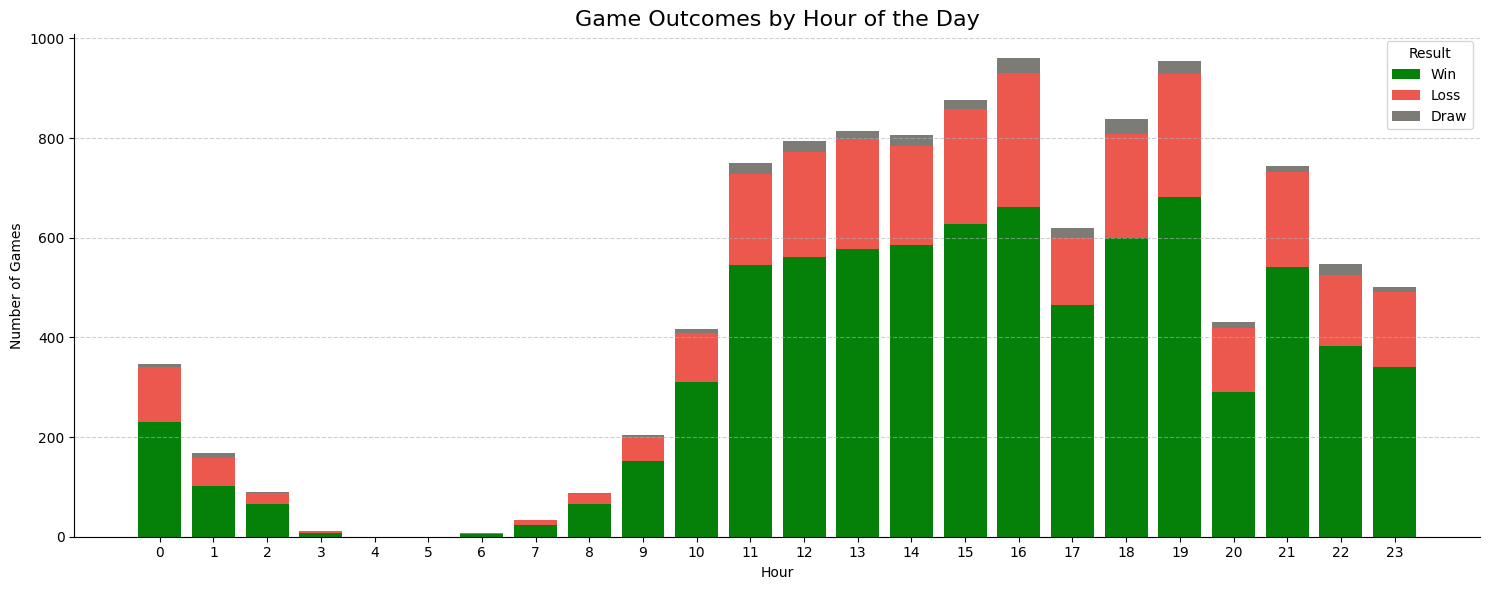

In [194]:
result_colors = {'Win': "#058009", 'Loss': "#EC584D", 'Draw': "#7D7B75"}

hourly_outcome = df.groupby(['GameHour', 'MatchResult']).size().unstack().fillna(0)

hourly_outcome = hourly_outcome.sort_index()

fig, ax = plt.subplots(figsize=(15, 6))
bottoms = np.zeros(len(hourly_outcome))

for result in ['Win', 'Loss', 'Draw']:
    ax.bar(hourly_outcome.index,
           hourly_outcome[result],
           bottom=bottoms,
           label=result,
           color=result_colors[result])
    bottoms += hourly_outcome[result]

ax.set_title("Game Outcomes by Hour of the Day", fontsize=16)
ax.set_xlabel("Hour")
ax.set_ylabel("Number of Games")
ax.set_xticks(range(0, 24))
ax.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
ax.legend(title="Result")
plt.tight_layout()
plt.show()


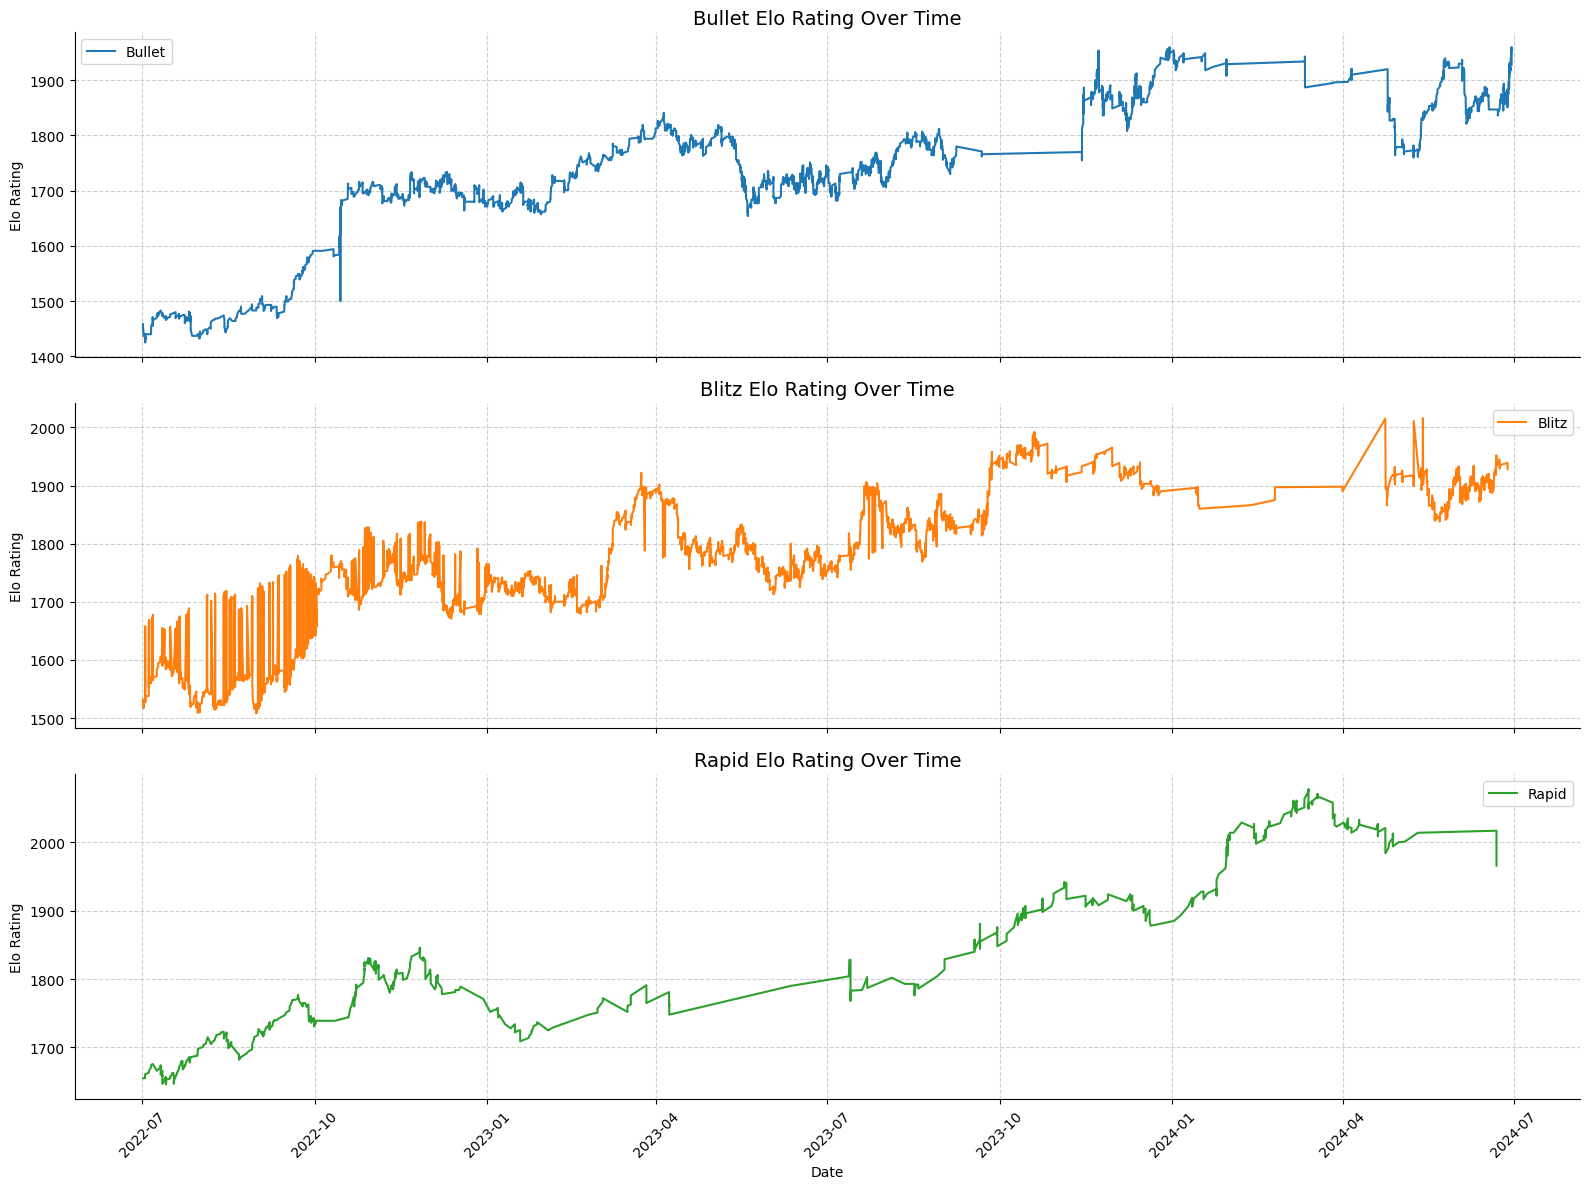

In [195]:
elo_data = df[df['Variant'] == 'Standard'].sort_values('LocalDateTime')

game_types = ['Bullet', 'Blitz', 'Rapid']

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

for i, game_type in enumerate(game_types):
    type_data = elo_data[elo_data['GameType'] == game_type]
    sns.lineplot(x=type_data['LocalDateTime'], y=type_data['PlayerElo'], ax=axes[i], label=game_type, color=sns.color_palette()[i])
    
    axes[i].set_title(f"{game_type} Elo Rating Over Time", fontsize=14)
    axes[i].set_ylabel("Elo Rating")
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend()

axes[-1].set_xlabel("Date")
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()



## Performance Related Analysis

In [196]:
# Standard games data for performance analysis
data = df[df['Variant'] == 'Standard'].copy()

<Figure size 1200x600 with 0 Axes>

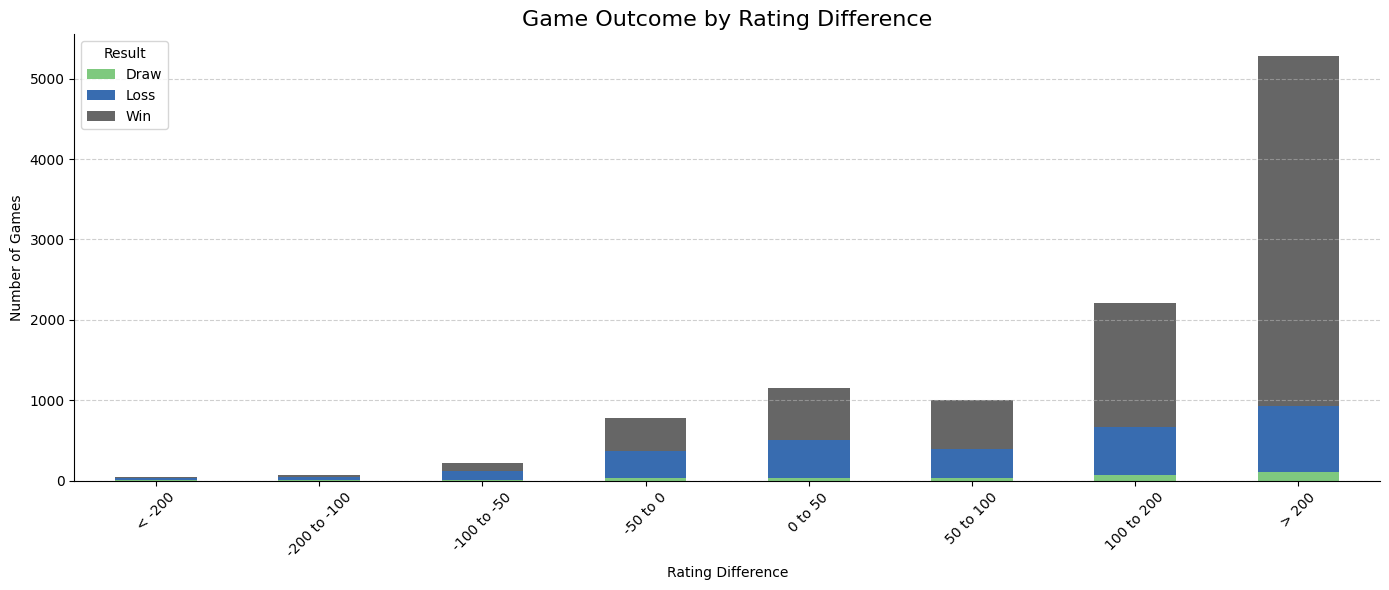

In [197]:
# Create rating difference bins
bins = [-1000, -200, -100, -50, 0, 50, 100, 200, 1000]
labels = ["< -200", "-200 to -100", "-100 to -50", "-50 to 0", "0 to 50", "50 to 100", "100 to 200", "> 200"]
data['RatingDiffBin'] = pd.cut(data['RatingDiff'], bins=bins, labels=labels)

# Group by RatingDiffBin and MatchResult
rating_result = data.groupby(['RatingDiffBin', 'MatchResult']).size().unstack().fillna(0)

# Plot
rating_result = rating_result.loc[labels]

plt.figure(figsize=(12, 6))
rating_result.plot(kind='bar', stacked=True, colormap='Accent', figsize=(14, 6))

plt.title("Game Outcome by Rating Difference", fontsize=16)
plt.xlabel("Rating Difference")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Result')
sns.despine()
plt.tight_layout()
plt.show()


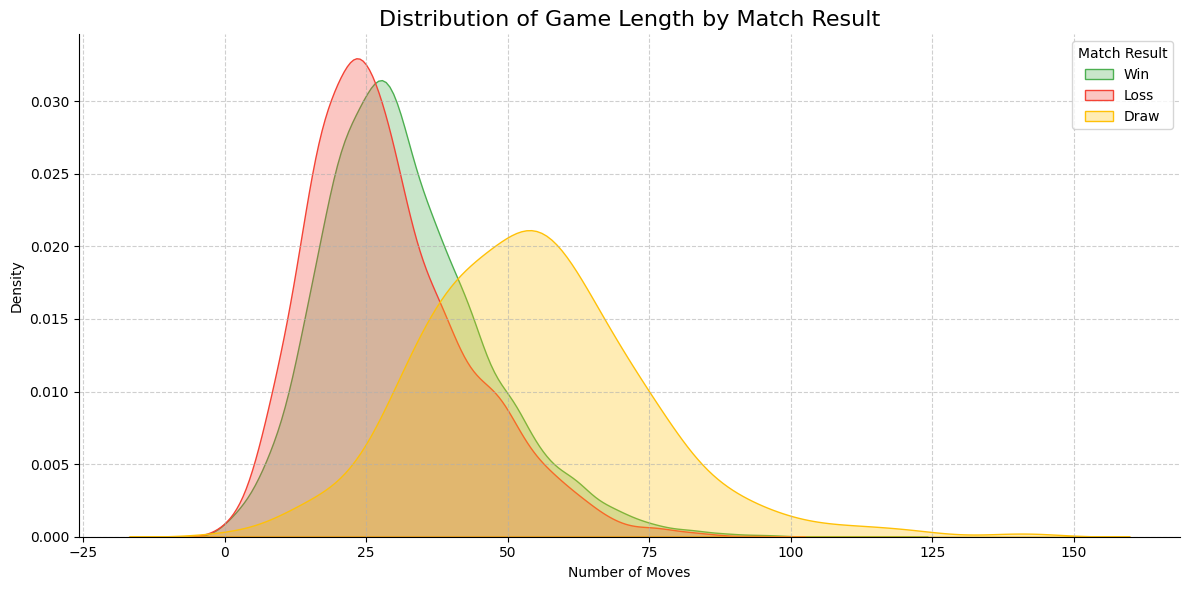

In [200]:
plt.figure(figsize=(12, 6))
for result, color in zip(['Win', 'Loss', 'Draw'], ['#4CAF50', '#F44336', '#FFC107']):
    sns.kdeplot(data=data[data['MatchResult'] == result], x='NumTurns', label=result, fill=True, alpha=0.3, color=color)

plt.title("Distribution of Game Length by Match Result", fontsize=16)
plt.xlabel("Number of Moves")
plt.ylabel("Density")
plt.legend(title='Match Result')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

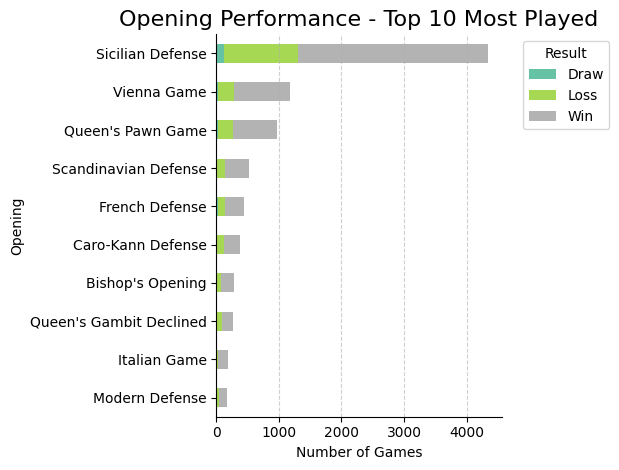

In [201]:
# Filter top 10 most common openings
top_openings = data['MainOpening'].value_counts().head(10).index
opening_df = data[data['MainOpening'].isin(top_openings)]

# Group by opening and result
opening_perf = opening_df.groupby(['MainOpening', 'MatchResult']).size().unstack().fillna(0)

# Sort by total games
opening_perf = opening_perf.loc[opening_perf.sum(axis=1).sort_values(ascending=True).index]

# Plot
plt.figure(figsize=(12, 8))
opening_perf.plot(kind='barh', stacked=True, colormap='Set2')

plt.title("Opening Performance - Top 10 Most Played", fontsize=16)
plt.xlabel("Number of Games")
plt.ylabel("Opening")
plt.legend(title="Result", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()


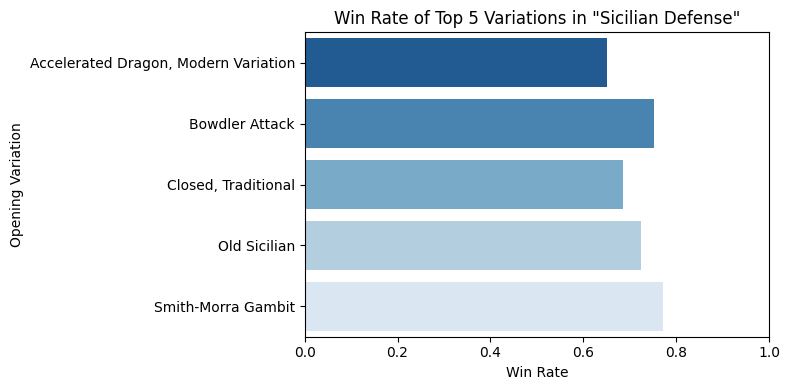

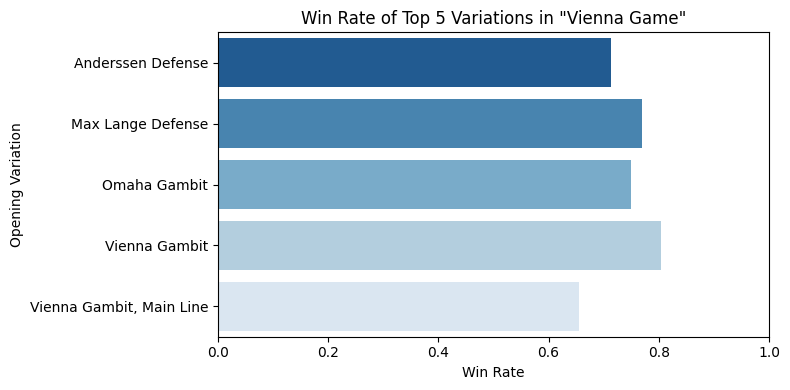

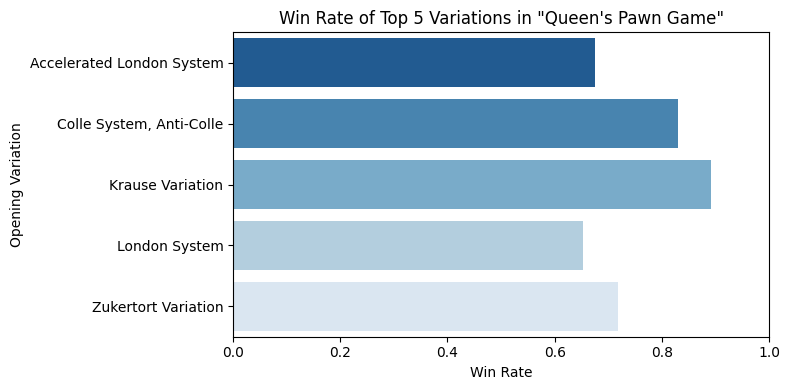

In [206]:
top_n_openings = 3
top_n_variations = 5

# Get top N main openings by volume
top_main_openings = data['MainOpening'].value_counts().head(top_n_openings).index

# Filter dataframe for top main openings
df_top_openings = data[data['MainOpening'].isin(top_main_openings)]

for main_opening in top_main_openings:
    df_open = df_top_openings[df_top_openings['MainOpening'] == main_opening]

    # Step 2: Get top N variations by volume for this main opening
    top_variations = df_open['OpeningVariation'].value_counts().head(top_n_variations).index

    df_top_vars = df_open[df_open['OpeningVariation'].isin(top_variations)]

    # Step 3: Calculate win rates for these variations
    stats = df_top_vars.groupby('OpeningVariation').agg(
        total_games=('MatchResult', 'count'),
        wins=('MatchResult', lambda x: (x == 'Win').sum())
    ).reset_index()

    stats['win_rate'] = stats['wins'] / stats['total_games']

    # Plotting
    plt.figure(figsize=(8, 4))
    sns.barplot(data=stats, x='win_rate', y='OpeningVariation', palette='Blues_r')
    plt.xlim(0, 1)
    plt.xlabel('Win Rate')
    plt.ylabel('Opening Variation')
    plt.title(f'Win Rate of Top {top_n_variations} Variations in "{main_opening}"')
    plt.tight_layout()
    plt.show()
